<a href="https://colab.research.google.com/github/Tsung-Hung/dummy-git/blob/master/%E6%AD%A1%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import torch 
import torch.nn as nn
import torchvision 
import torch.nn.functional as F

# LayerNorm replace by BatchNorm

In [ ]:
#https://discuss.pytorch.org/t/f-batch-norm-returns-different-results-in-train-and-eval-mode-given-same-setup/140493
#https://stackoverflow.com/questions/68478856/pytorch-batchnorm2d-calculation
#https://www.bing.com/search?q=class+BatchNorm2d+source+code+&qs=n&form=QBRE&msbsrank=6_6__0&sp=-1&pq=class+batchnorm2d+source+&sc=6-25&sk=&cvid=08ABB45423784303AC7BE5FF2B9A5E71&ghsh=0&ghacc=0&ghpl=&ntref=1
#https://discuss.pytorch.org/t/how-to-use-scripting-with-custom-batchnorm/85375/5

In [ ]:
# https://discuss.pytorch.org/t/how-to-use-scripting-with-custom-batchnorm/85375/6

In [67]:
batch, sentence_length, embedding_dim = 3, 3, 5
embedding = torch.randn(batch, sentence_length, embedding_dim)
print(embedding)
layer_norm = nn.LayerNorm(embedding_dim)
# Activate module
origin = layer_norm(embedding)
print(origin)

tensor([[[-0.0695,  0.7827,  1.2249,  0.4994, -0.7933],
         [ 1.1934, -1.1980, -0.8729,  0.2012, -0.2869],
         [ 0.6157, -0.9868,  0.3704,  0.1896,  0.9253]],

        [[-1.5359,  0.1314, -0.2279, -0.4926, -0.9508],
         [-0.8782,  0.9472,  0.8163, -0.5499, -1.0813],
         [-1.0221,  0.4090,  1.0664,  0.2499, -0.9428]],

        [[ 0.6442,  1.3447,  0.0366, -0.1011,  0.5214],
         [ 2.3155,  0.1930, -0.2016, -1.5928,  1.1625],
         [-1.1805,  1.1500,  1.7416,  0.5894, -0.7549]]])
tensor([[[-0.5684,  0.6476,  1.2786,  0.2433, -1.6011],
         [ 1.6429, -1.1917, -0.8063,  0.4668, -0.1117],
         [ 0.6014, -1.8516,  0.2259, -0.0509,  1.0752]],

        [[-1.5871,  1.2869,  0.6676,  0.2112, -0.5785],
         [-0.8480,  1.2753,  1.1231, -0.4661, -1.0843],
         [-1.2011,  0.5634,  1.3739,  0.3672, -1.1033]],

        [[ 0.3028,  1.6712, -0.8841, -1.1530,  0.0630],
         [ 1.4773, -0.1388, -0.4393, -1.4986,  0.5994],
         [-1.3389,  0.7558,  1.2876,  

In [70]:
def Layer_norm(x):
    '''
    BatchNorm2d
    test = Layer_norm1(embedding)
    test
    '''
    batch, sentence_length, embedding_dim = x.shape
    x = x.reshape(1, batch*sentence_length, embedding_dim, 1)
    layer_norm = nn.BatchNorm2d(x.shape[1], track_running_stats=True, affine=True)
    output = layer_norm(x)
    output = output.reshape(output.shape[1], output.shape[2]).reshape(batch, sentence_length, embedding_dim)
    return output

def Layer_norm2(x):
    '''
    BatchNorm1d
    test = Layer_norm2(embedding)
    test
    '''
    batch, sentence_length, embedding_dim = x.shape
    x = x.reshape(1, batch*sentence_length, embedding_dim)
    layer_norm = nn.BatchNorm1d(x.shape[1], track_running_stats=True, affine=True)
    output = layer_norm(x)
    output = output.reshape(output.shape[1], output.shape[2]).reshape(batch, sentence_length, embedding_dim)
    return output

class LayerNorm2(nn.Module):
    '''
    layer_norm2 = LayerNorm2(embedding_dim)
    # Activate module
    test = layer_norm2(embedding)
    test
    '''
    def __init__(self, num_features, eps=1e-6):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(num_features), requires_grad=False)
        self.bias = nn.Parameter(torch.zeros(num_features), requires_grad=False)
        self.eps = eps

    def forward(self, x):
        shape = x.shape
        mean = x.mean(-1)
        std = torch.sqrt(x.var(-1, unbiased=False))
        res = torch.stack([((x[i][j] - mean[i][j]).squeeze(0) / (std[i][j].squeeze(0) + self.eps)) for i in range(x.shape[0]) for j in range(x.shape[1])], dim=0)
        return res.reshape(shape)

layer_norm2 = LayerNorm2(embedding_dim)
# Activate module
test = layer_norm2(embedding)
test

tensor([[[-0.5684,  0.6476,  1.2786,  0.2433, -1.6011],
         [ 1.6429, -1.1917, -0.8063,  0.4668, -0.1117],
         [ 0.6014, -1.8516,  0.2259, -0.0509,  1.0752]],

        [[-1.5871,  1.2869,  0.6676,  0.2112, -0.5785],
         [-0.8480,  1.2753,  1.1231, -0.4661, -1.0843],
         [-1.2011,  0.5634,  1.3739,  0.3672, -1.1034]],

        [[ 0.3028,  1.6713, -0.8841, -1.1531,  0.0630],
         [ 1.4773, -0.1388, -0.4393, -1.4986,  0.5994],
         [-1.3389,  0.7558,  1.2876,  0.2519, -0.9564]]])

In [23]:
def Layer_norm3(x):
    '''
    BatchNorm1d, doesn't work 
    '''
    batch, sentence_length, embedding_dim = x.shape
    x = x.reshape(1, batch*sentence_length, embedding_dim)
    layer_norm = nn.BatchNorm1d(x.shape[1], track_running_stats=True, affine=True)
    #print(layer_norm.weight)
    #print(layer_norm.bias)
    #print(layer_norm.running_mean)
    # Set the running statistics to constant
    layer_norm.running_mean.fill_(0)
    layer_norm.running_var.fill_(1) 

    output = layer_norm(x)
    output = output.reshape(output.shape[1], output.shape[2]).reshape(batch, sentence_length, embedding_dim)
    return output

test = Layer_norm3(embedding)
test

tensor([[[ 1.0026,  1.0331, -0.1616, -1.6937, -0.1804],
         [ 0.0512,  1.7732, -1.2995, -0.3777, -0.1472],
         [-1.0155, -0.7847,  1.7402, -0.3717,  0.4318]],

        [[ 1.0374, -1.0427,  1.1859,  0.0153, -1.1958],
         [ 0.5893, -1.5850, -0.1593,  1.4283, -0.2733],
         [-0.3734, -1.0591,  0.8069,  1.5153, -0.8897]],

        [[ 0.3328,  1.2943, -1.4021, -0.8945,  0.6695],
         [-0.5777, -1.5340,  1.3682,  0.0848,  0.6587],
         [ 1.3676, -0.8106, -0.7108, -0.9119,  1.0656]]],
       grad_fn=<ReshapeAliasBackward0>)

In [5]:
norm3 = nn.BatchNorm1d(3, track_running_stats=False, affine=True)
def loop_layernorm1(x):
    batch, sentence_length, embedding_dim = x.shape
    # layer_norm = nn.BatchNorm1d(sentence_length,momentum=1.0, affine=True, track_running_stats=False)
    
    split_x = torch.split(x,1,dim=0)
    concate_list = []
    for small_x in split_x:
        small_x = small_x.squeeze().permute(1,0)
        small_x = norm3(small_x).permute(1,0)
        concate_list.append(small_x)
        # print (small_x.shape)
    
    concate = torch.stack(concate_list)
    # print (concate.shape)
    return concate


test = loop_layernorm1(embedding)
test

tensor([[[-0.2003,  0.1510, -0.3894,  1.7505, -1.3118],
         [-0.7539, -0.6769,  0.7053, -0.9046,  1.6301],
         [ 0.6032, -1.0329,  0.7856,  1.0239, -1.3797]],

        [[-0.2888,  1.2877, -1.3667, -0.6293,  0.9972],
         [-1.4319,  0.1985,  1.0012, -0.8536,  1.0858],
         [-0.4630, -0.9643,  1.1705,  1.2358, -0.9790]]],
       grad_fn=<StackBackward0>)

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the SimpleNet model
class SimpleNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleNet, self).__init__()
        self.bn1 = BatchNorm1dWithBiasedStd(10, track_running_stats=True, affine=True, momentum=1)
        self.fc1 = nn.Linear(640, 1)
    
    def Layer_norm1(self, x):
        batch, sentence_length, embedding_dim = x.shape
        x = x.reshape(1, batch*sentence_length, embedding_dim)
        # layer_norm = nn.BatchNorm2d(x.shape[1], track_running_stats=False, affine=True)
        output = self.bn1(x)
        output = output.reshape(output.shape[1], output.shape[2]).reshape(batch, sentence_length, embedding_dim)
        return output

    def forward(self, x):
        x = self.Layer_norm1(x) #input(1,10,64)
        #x = x[0,0,0]
        x = x.view(-1, 640)
        x = self.fc1(x)
        return x

class BatchNorm1dWithBiasedStd(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=1, affine=False, track_running_stats=True):
        super(BatchNorm1dWithBiasedStd, self).__init__()
        self.bn = nn.BatchNorm1d(num_features, eps, momentum, affine, track_running_stats)

    def forward(self, input):
        mean = torch.mean(input, dim=2)
        var = torch.var(input, dim=2, unbiased=False)
        std = torch.sqrt(var + self.bn.eps)
        self.bn.running_mean = mean.squeeze()
        self.bn.running_var = std.squeeze()
        return self.bn(input)

# Generate a simulated dataset
inputs = torch.rand(3, 10, 64)
raw_inputs = inputs
labels = torch.randint(low=0, high=10, size=(3,))
inputs = torch.Tensor(inputs)
labels = torch.Tensor(labels).long()
train_dataset = torch.utils.data.TensorDataset(inputs, labels)

# Create a DataLoader to load and batch the data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)

# Define the loss function and the optimizer
net = SimpleNet()
criterion = nn.L1Loss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(5):
    running_loss = 0.0
    #print("1. Running mean:", net.bn1.running_mean)
    for i, data in enumerate(train_loader):
        inputs, labels = data
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        #print("2. Running mean:", net.bn1.running_mean)
        #print("2. Running var:", net.bn1.running_var)
    print('Epoch [{}/50], Loss: {:.4f}'.format(epoch+1, running_loss / len(train_loader)))
    #print("3. Running mean:", net.bn1.running_mean)
    print("===========================")

Epoch [1/50], Loss: 5.1536
Epoch [2/50], Loss: 4.4673
Epoch [3/50], Loss: 2.3538
Epoch [4/50], Loss: 2.1608
Epoch [5/50], Loss: 2.7574


In [24]:
torch.var(raw_inputs, dim=2, unbiased=True)

tensor([[0.0895, 0.0713, 0.0750, 0.0896, 0.0849, 0.0848, 0.0756, 0.0800, 0.0819,
         0.0787],
        [0.0893, 0.0879, 0.0794, 0.0821, 0.0701, 0.0740, 0.0967, 0.0882, 0.0798,
         0.0740],
        [0.0862, 0.0882, 0.0827, 0.0925, 0.0762, 0.0797, 0.0779, 0.0734, 0.0812,
         0.0952]])

In [45]:
print('weight: ',net.bn1.weight)
print('bias: ',net.bn1.bias)
print('running mean: ',net.bn1.running_mean)
print('running variance: ',net.bn1.running_var)

AttributeError: ignored

In [27]:
def set_bn_training(m):
    if isinstance(m, nn.BatchNorm1d):
        m.train()

#test_sample = torch.randn(1, 10, 64)
#print(test_sample)
#print(torch.mean(test_sample, dim=2))
net.eval()
print("After Running mean:", net.bn1.running_mean)
print(net.bn1.training)

net.apply(set_bn_training)
output = net(test_sample)
print("Before Running mean:", net.bn1.running_mean)
print(net.bn1.training)

print('-----------------------')
print('weight: ',net.bn1.weight)
print('bias: ',net.bn1.bias)
print('running mean: ',net.bn1.running_mean)
print('running variance: ',net.bn1.running_var)

After Running mean: tensor([0.4620, 0.5378, 0.4928, 0.4523, 0.4437, 0.4672, 0.5298, 0.5000, 0.4638,
        0.4803])
False
Before Running mean: tensor([ 0.1164,  0.1476,  0.0975, -0.3495,  0.2527,  0.0618,  0.0524,  0.0207,
        -0.1958,  0.0963])
True
-----------------------
weight:  Parameter containing:
tensor([0.9897, 0.9909, 0.9890, 0.9898, 0.9900, 0.9897, 0.9904, 0.9873, 0.9883,
        0.9891], requires_grad=True)
bias:  Parameter containing:
tensor([-0.0009, -0.0006, -0.0028, -0.0009, -0.0002, -0.0011, -0.0001, -0.0023,
        -0.0006, -0.0015], requires_grad=True)
running mean:  tensor([ 0.1164,  0.1476,  0.0975, -0.3495,  0.2527,  0.0618,  0.0524,  0.0207,
        -0.1958,  0.0963])
running variance:  tensor([0.9583, 1.0476, 1.3100, 0.9045, 0.7619, 0.9691, 0.9115, 0.8296, 1.2526,
        1.2910])


In [47]:
output = net(test_sample)
output

tensor([[-1.1093]], grad_fn=<AddmmBackward0>)

In [29]:
torch.var(test_sample, dim=2, unbiased=True)

tensor([[0.9583, 1.0476, 1.3100, 0.9045, 0.7619, 0.9691, 0.9115, 0.8296, 1.2526,
         1.2910]])

In [31]:
batch, sentence_length, embedding_dim = 1, 3, 3
embedding = torch.randn(batch, sentence_length, embedding_dim)
print(embedding)
layer_norm = nn.LayerNorm(embedding_dim)
# Activate module
origin = layer_norm(embedding)
print(origin)

tensor([[[ 1.2740, -0.8680,  0.0917],
         [-0.2535, -1.2854, -0.3722],
         [-0.1889, -0.6872,  0.4463]]])
tensor([[[ 1.2649, -1.1802, -0.0847],
         [ 0.8319, -1.4063,  0.5744],
         [-0.0983, -1.1726,  1.2709]]], grad_fn=<NativeLayerNormBackward0>)


In [33]:
def Layer_norm2(x):
    '''
    BatchNorm1d
    '''
    batch, sentence_length, embedding_dim = x.shape
    x = x.reshape(1, batch*sentence_length, embedding_dim)
    layer_norm = nn.BatchNorm1d(x.shape[1], track_running_stats=True, affine=True)
    output = layer_norm(x)
    output = output.reshape(output.shape[1], output.shape[2]).reshape(batch, sentence_length, embedding_dim)
    return output

test = Layer_norm2(embedding)
test

tensor([[[ 1.2649, -1.1802, -0.0847],
         [ 0.8319, -1.4063,  0.5744],
         [-0.0983, -1.1726,  1.2709]]], grad_fn=<ReshapeAliasBackward0>)

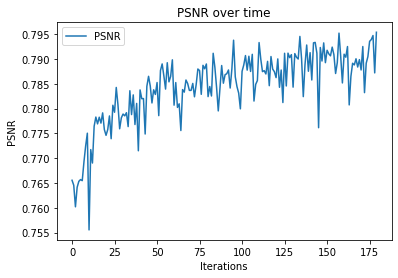

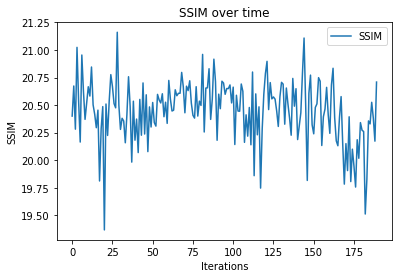

In [36]:
import matplotlib.pyplot as plt

PSNR = []
SSIM = []

with open('log.txt', 'r') as f:
    for line in f:
        data = re.findall(r'\d+\.\d+', line)

        data = [float(n) for n in data]
        PSNR.append(float(data[0]))
        SSIM.append(float(data[1]))

# Plot the loss
plt.plot(PSNR[20:], label='PSNR')
plt.xlabel('Iterations')
plt.ylabel('PSNR')
plt.title('PSNR over time')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(SSIM[10:], label='SSIM')
plt.xlabel('Iterations')
plt.ylabel('SSIM')
plt.title('SSIM over time')
plt.legend()
plt.show()

# matmul 4D tensor

In [ ]:
a1 = torch.rand(2,2,4,8)
a2 = torch.rand(2,2,6,8)

result = torch.matmul(a1, a2.transpose(-2,-1))
print('Shape : ', result.shape)
result

Shape :  torch.Size([2, 2, 4, 6])


tensor([[[[2.7529, 1.8048, 3.4391, 3.1496, 2.6274, 3.4769],
          [2.4426, 2.0310, 2.9492, 2.6178, 2.0630, 3.0072],
          [2.5750, 1.7425, 2.7397, 2.7792, 2.1718, 3.1972],
          [1.6580, 1.1785, 2.3369, 1.8366, 1.7175, 2.1643]],

         [[1.8686, 2.8051, 1.5285, 2.3255, 2.7303, 1.7538],
          [1.8524, 3.0672, 2.7623, 2.5586, 2.9062, 1.7388],
          [1.6032, 2.7890, 2.5647, 2.1229, 2.5603, 1.6270],
          [2.3407, 3.4430, 3.3401, 2.8424, 3.5280, 1.9627]]],


        [[[1.7584, 1.6373, 1.7781, 2.0835, 2.0114, 2.3218],
          [2.0874, 1.6023, 2.1677, 1.5689, 1.9413, 2.7391],
          [1.9117, 1.8505, 1.7674, 1.7359, 1.6690, 2.8128],
          [0.9375, 1.0843, 1.4811, 0.9806, 0.9975, 1.1700]],

         [[2.1752, 3.0235, 2.3582, 1.6890, 2.5907, 2.0623],
          [2.1033, 2.5483, 1.6289, 1.6029, 1.9231, 1.4339],
          [2.8346, 3.0774, 2.4985, 1.7280, 2.7036, 2.2743],
          [2.0064, 3.0427, 2.5664, 1.8976, 2.3499, 2.1540]]]])

In [ ]:
def new_matmul1(a1,a2):

    k = a1.shape[0]*a1.shape[1]    
    mul_list = []
    for i in range(a1.shape[0]):
        for j in range(a1.shape[1]):
            
            mul = torch.matmul(a1[i,j,:],a2[i,j,:])                
            mul_list.append(mul)

    combine = torch.stack(mul_list)  
    combine = combine.view(a1.shape[0],a1.shape[1],combine.shape[1],combine.shape[2])
    
    return combine

result1 = new_matmul1(a1, a2.transpose(-2,-1))
print('Shape : ', result1.shape)
print(result1)

Shape :  torch.Size([2, 2, 4, 6])
tensor([[[[2.7529, 1.8048, 3.4391, 3.1496, 2.6274, 3.4769],
          [2.4426, 2.0310, 2.9492, 2.6178, 2.0630, 3.0072],
          [2.5750, 1.7425, 2.7397, 2.7792, 2.1718, 3.1972],
          [1.6580, 1.1785, 2.3369, 1.8366, 1.7175, 2.1643]],

         [[1.8686, 2.8051, 1.5285, 2.3255, 2.7303, 1.7538],
          [1.8524, 3.0672, 2.7623, 2.5586, 2.9062, 1.7388],
          [1.6032, 2.7890, 2.5647, 2.1229, 2.5603, 1.6270],
          [2.3407, 3.4430, 3.3401, 2.8424, 3.5280, 1.9627]]],


        [[[1.7584, 1.6373, 1.7781, 2.0835, 2.0114, 2.3218],
          [2.0874, 1.6023, 2.1677, 1.5689, 1.9413, 2.7391],
          [1.9117, 1.8505, 1.7674, 1.7359, 1.6690, 2.8128],
          [0.9375, 1.0843, 1.4811, 0.9806, 0.9975, 1.1700]],

         [[2.1752, 3.0235, 2.3582, 1.6890, 2.5907, 2.0623],
          [2.1033, 2.5483, 1.6289, 1.6029, 1.9231, 1.4339],
          [2.8346, 3.0774, 2.4985, 1.7280, 2.7036, 2.2743],
          [2.0064, 3.0427, 2.5664, 1.8976, 2.3499, 2.1540]

In [ ]:
def new_matmul2(a1, a2):

    combine = torch.stack([torch.matmul(a1[i][j], a2[i][j]) for i in range(a1.shape[0]) for j in range(a1.shape[1])], dim=0)        
    return combine.reshape(a1.shape[0], a1.shape[1], a1.shape[2], a2.shape[3])

result2 = new_matmul1(a1, a2.transpose(-2,-1))
print('Shape : ', result2.shape)
print(result2)
print(torch.all(result==result2))

Shape :  torch.Size([2, 2, 4, 6])
tensor([[[[2.7529, 1.8048, 3.4391, 3.1496, 2.6274, 3.4769],
          [2.4426, 2.0310, 2.9492, 2.6178, 2.0630, 3.0072],
          [2.5750, 1.7425, 2.7397, 2.7792, 2.1718, 3.1972],
          [1.6580, 1.1785, 2.3369, 1.8366, 1.7175, 2.1643]],

         [[1.8686, 2.8051, 1.5285, 2.3255, 2.7303, 1.7538],
          [1.8524, 3.0672, 2.7623, 2.5586, 2.9062, 1.7388],
          [1.6032, 2.7890, 2.5647, 2.1229, 2.5603, 1.6270],
          [2.3407, 3.4430, 3.3401, 2.8424, 3.5280, 1.9627]]],


        [[[1.7584, 1.6373, 1.7781, 2.0835, 2.0114, 2.3218],
          [2.0874, 1.6023, 2.1677, 1.5689, 1.9413, 2.7391],
          [1.9117, 1.8505, 1.7674, 1.7359, 1.6690, 2.8128],
          [0.9375, 1.0843, 1.4811, 0.9806, 0.9975, 1.1700]],

         [[2.1752, 3.0235, 2.3582, 1.6890, 2.5907, 2.0623],
          [2.1033, 2.5483, 1.6289, 1.6029, 1.9231, 1.4339],
          [2.8346, 3.0774, 2.4985, 1.7280, 2.7036, 2.2743],
          [2.0064, 3.0427, 2.5664, 1.8976, 2.3499, 2.1540]

In [ ]:
def new_matmul3(a1, a2):
  '''
  a1 = (2,2,4,8)
  a2 = (2,2,6,8)
  torch(a2, a1.T)
  '''
  B1, N1, H1, T1 = a1.shape
  B2, N2, T2, H2 = a2.shape
  a1 = a1.reshape(B1 * N1 * H1, T1)
  #print('a1 : ', a1.shape)
  a2 = a2.permute(2,0,1,3)
  a2 = a2.reshape(T2, B2 * N2 * H2)
  #print('a2 : ', a2.shape)
  result = torch.matmul(a1, a2)
  result = torch.stack([result[i*H1:(i+1)*H1 ,i*H2:(i+1)*H2] for i in range(B1*N1)])
  result = result.reshape(B1,N1,H1,H2)
  return result

result3 = new_matmul3(a1, a2.transpose(-2,-1))
print('Shape : ', result3.shape)
print(result3)

Shape :  torch.Size([2, 2, 4, 6])
tensor([[[[2.7529, 1.8048, 3.4391, 3.1496, 2.6274, 3.4769],
          [2.4426, 2.0310, 2.9492, 2.6178, 2.0630, 3.0072],
          [2.5750, 1.7425, 2.7397, 2.7792, 2.1718, 3.1972],
          [1.6580, 1.1785, 2.3369, 1.8366, 1.7175, 2.1643]],

         [[1.8686, 2.8051, 1.5285, 2.3255, 2.7303, 1.7538],
          [1.8524, 3.0672, 2.7623, 2.5586, 2.9062, 1.7388],
          [1.6032, 2.7890, 2.5647, 2.1229, 2.5603, 1.6270],
          [2.3407, 3.4430, 3.3401, 2.8424, 3.5280, 1.9627]]],


        [[[1.7584, 1.6373, 1.7781, 2.0835, 2.0114, 2.3218],
          [2.0874, 1.6023, 2.1677, 1.5689, 1.9413, 2.7391],
          [1.9117, 1.8505, 1.7674, 1.7359, 1.6690, 2.8128],
          [0.9375, 1.0843, 1.4811, 0.9806, 0.9975, 1.1700]],

         [[2.1752, 3.0235, 2.3582, 1.6890, 2.5907, 2.0623],
          [2.1033, 2.5483, 1.6289, 1.6029, 1.9231, 1.4339],
          [2.8346, 3.0774, 2.4985, 1.7280, 2.7036, 2.2743],
          [2.0064, 3.0427, 2.5664, 1.8976, 2.3499, 2.1540]

In [ ]:
def new_matmul3_plus(a1, a2):
    '''
    a1 = (2,2,4,8)
    a2 = (2,2,6,8)
    torch(a2, a1.T)
    '''
    B1, N1, H1, T1 = a1.shape
    B2, N2, T2, H2 = a2.shape
    #print(H1,T1,T2,H2)
    a1 = a1.reshape(B1 * N1 * H1, T1)

    a2 = a2.permute(2,0,1,3)
    a2 = a2.reshape(T2, B2 * N2 * H2)

    result = torch.matmul(a1, a2)
    result = result.reshape(B1*N1, B1*N1, H1, H2).transpose(1,2)
    result = result.reshape(B1*N1*B1*N1, H1, H2)

    index = torch.arange(0, B1*N1*B1*N1, (B1*N1)+1)
    #result = result[index]
    #result= torch.index_select(result,0, index)
    result = result[0:4,:,:]
    print(result.shape)
    #result = result.reshape(1, N1, H1, H2)
    result = result.unsqueeze(0)
    print(result.shape)

    return result


a1 = torch.rand(1,4,150,16)
a2 = torch.rand(1,4,10,16)
result3_plus = new_matmul3_plus(a1, a2.transpose(-2,-1))
print('Shape : ', result3_plus.shape)
print(result3_plus)   

torch.Size([4, 150, 10])
torch.Size([1, 4, 150, 10])
Shape :  torch.Size([1, 4, 150, 10])
tensor([[[[3.3838, 3.4120, 3.1763,  ..., 2.8965, 3.7930, 4.0286],
          [3.3731, 3.8181, 3.4525,  ..., 3.6661, 5.1197, 4.4346],
          [3.9121, 3.2665, 3.6328,  ..., 2.9576, 4.6977, 3.8945],
          ...,
          [2.4998, 3.4385, 3.3605,  ..., 3.1234, 4.2989, 4.4229],
          [4.0505, 3.9032, 3.7065,  ..., 3.2579, 4.0980, 4.0834],
          [3.5518, 4.2238, 3.7948,  ..., 2.9784, 3.0524, 3.3058]],

         [[2.8244, 3.6988, 3.1481,  ..., 2.4031, 3.4871, 3.2455],
          [3.7828, 5.2183, 4.0348,  ..., 3.7653, 3.7374, 3.7913],
          [3.0486, 3.5487, 3.0653,  ..., 3.7951, 4.5977, 4.5349],
          ...,
          [3.3623, 3.3315, 4.0794,  ..., 3.6210, 4.2255, 3.8217],
          [3.2363, 4.5231, 3.3725,  ..., 3.9814, 4.6853, 5.5462],
          [2.9573, 3.0535, 3.6217,  ..., 2.7151, 3.8101, 3.8697]],

         [[4.6520, 5.1243, 4.9299,  ..., 4.3121, 4.3224, 4.1277],
          [4.5314,

In [ ]:
def new_matmul4(a1, a2):
  '''
  a1 = (2,2,4,8)  
  a2 = (2,2,6,8)
  a1_matrix = (16,32)
  a2_matrix = (32,24)
  '''
  a1_matrix = torch.block_diag(*[a1[i][j] for i in range(a1.shape[0]) for j in range(a1.shape[1])])
  a2_matrix = torch.block_diag(*[a2[i][j] for i in range(a2.shape[0]) for j in range(a2.shape[1])])
  identity = torch.cat([torch.eye(a2.shape[3]) for _ in range(a2.shape[0]*a2.shape[1])]).cuda()
  a = torch.ones(a2.shape[0]*a2.shape[1],a2.shape[3])
  identity2 = torch.diag_embed(a).reshape(a2.shape[0]*a2.shape[1]*a2.shape[3], a2.shape[3])
  result = torch.matmul(a1_matrix, a2_matrix)
  result = torch.matmul(result, identity2)
  return result

def new_matmul_final(a1, a2):
  '''
  a1 = (2,2,4,8)  
  a2 = (2,2,6,8)
  a1_matrix = (16,32)
  a2_matrix = (32,24)
  '''
  a1_matrix = torch.block_diag(*[a1[i][j] for i in range(a1.shape[0]) for j in range(a1.shape[1])])
  a2_matrix = torch.block_diag(*[a2[i][j] for i in range(a2.shape[0]) for j in range(a2.shape[1])])
  #identity = torch.cat([torch.eye(a2.shape[3]) for _ in range(a2.shape[0]*a2.shape[1])]).cuda()
  a = torch.ones(a2.shape[0]*a2.shape[1],a2.shape[3])
  #identity2 = torch.diag_embed(a).reshape(a2.shape[0]*a2.shape[1]*a2.shape[3], a2.shape[3]).cuda()
  result = torch.matmul(a1_matrix, a2_matrix)
  #result = torch.matmul(result, identity2)
  return result

#result4 = new_matmul4(a1,a2.transpose(-2,-1))
#print('Shape : ', result4.shape)
#print(result4)

In [ ]:

B2, N2, T2, H2 = a2.shape
a2 = a2.reshape( B2 * N2* T2, H2)
print(a2.shape)
one = torch.ones(B2*N2, H2)
a2_I = torch.diag_embed(one).permute(1,0,2).reshape(H2, B2*N2*H2)
a2_m = torch.matmul(a2, a2_I)
a2_m

torch.Size([6, 4])


tensor([[0.7210, 0.2294, 0.4558, 0.0930, 0.7210, 0.2294, 0.4558, 0.0930],
        [0.2017, 0.0607, 0.4425, 0.3461, 0.2017, 0.0607, 0.4425, 0.3461],
        [0.5573, 0.3538, 0.4102, 0.7203, 0.5573, 0.3538, 0.4102, 0.7203],
        [0.8404, 0.7805, 0.1481, 0.0404, 0.8404, 0.7805, 0.1481, 0.0404],
        [0.7765, 0.7399, 0.3273, 0.6756, 0.7765, 0.7399, 0.3273, 0.6756],
        [0.1364, 0.3438, 0.1867, 0.5070, 0.1364, 0.3438, 0.1867, 0.5070]])

In [ ]:
one = torch.ones(B2*N2, H2)
a2_I = torch.diag_embed(one).permute(1,0,2).reshape(H2, B2*N2*H2)
a2_I

tensor([[1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1.]])

In [ ]:
#test = torch.eye(a2.shape[1])
one = torch.ones(2,4)
a2_I = torch.diag_embed(one)
a2_I
#test = torch.matmul(a2,test)
#test

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]])

In [ ]:
a1 = torch.rand(1,4,15000,16).cuda()
a2 = torch.rand(1,4,1000,16).cuda()

%timeit -n 100 -r 7 torch.matmul(a1, a2.transpose(-2,-1))

25.4 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 -r 7 new_matmul1(a1, a2.transpose(-2,-1))

3.99 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 -r 7 new_matmul2(a1, a2.transpose(-2,-1))

3.57 ms ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 200 -r 7 new_matmul3(a1, a2.transpose(-2,-1))

The slowest run took 8.39 times longer than the fastest. This could mean that an intermediate result is being cached.
2.01 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 200 loops each)


In [ ]:
%timeit -n 100 -r 7 new_matmul4(a1, a2.transpose(-2,-1))

11.5 ms ± 7.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
a1_matrix = torch.block_diag(*[a1[i][j] for i in range(a1.shape[0]) for j in range(a1.shape[1])])
a2_matrix = torch.block_diag(*[a2[i][j] for i in range(a2.shape[0]) for j in range(a2.shape[1])])

%timeit -n 100 -r 7 torch.matmul(a1_matrix, a2_matrix.transpose(-2,-1))

746 µs ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
from numpy import matrix
A = matrix([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]])
A2 = A.I
B = matrix([[1,3,2],[6,1,2],[3,1,1],[1,4,1],[1,1,2],[3,2,1]])
B * A2 * 2

matrix([[1., 3., 2., 1., 3., 2.],
        [6., 1., 2., 6., 1., 2.],
        [3., 1., 1., 3., 1., 1.],
        [1., 4., 1., 1., 4., 1.],
        [1., 1., 2., 1., 1., 2.],
        [3., 2., 1., 3., 2., 1.]])

In [ ]:
AB = matrix([[1,3,2,0,0,0],[6,1,2,0,0,0],[3,1,1,0,0,0],[0,0,0,1,4,1],[0,0,0,1,1,2],[0,0,0,3,2,1]])
I1 = matrix([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]])
I2 = matrix([[1,0,0,1,0,0],[0,1,0,0,1,0],[0,0,1,0,0,1]])
res = AB*I1
res

matrix([[1, 3, 2],
        [6, 1, 2],
        [3, 1, 1],
        [1, 4, 1],
        [1, 1, 2],
        [3, 2, 1]])

In [ ]:
x = torch.rand(1,10,64)
#print(x)
gamma, color = x[:, 0].unsqueeze(1), x[:, 1:]
#print(gamma)
#print(color)
#print(color.shape)
gamma_linear = nn.Linear(64, 1)
gamma_base = nn.Parameter(torch.ones((1)), requires_grad=False)
gamma = gamma_linear(gamma).squeeze(-1) 
#print(gamma_base)

color_linear = nn.Linear(64, 1)
color_base = nn.Parameter(torch.eye((3)), requires_grad=True)
color = color_linear(color).squeeze(-1).view(-1, 3, 3) + color_base
print(color)

tensor([[[ 0.7081, -0.1413,  0.0535],
         [-0.1295,  0.9730, -0.2034],
         [ 0.1608,  0.1183,  1.0428]]], grad_fn=<AddBackward0>)
